Download the  data set on kaggle: https://www.kaggle.com/alxmamaev/flowers-recognition

This dataset contains 4323 images of flowers.The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion. For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. Photos are not reduced to a single size, they have different proportions!

Url of the dat set: https://storage.googleapis.com/kaggle-data-sets/8782/44566/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1572461993&Signature=sB2gDNcvva0qfGtM9gkAa4AcsKPw%2BgrqiM2i0oasnLuq5qG5fEMLkl9C9ieTyJdp1NV%2FioB%2BfLCQ%2FHD9Wod5gD0bz89vPR7r%2BUPakG%2FBsl6szLZxTVvSsPC6vNYuQRIL7vQiIcHlzrh8xWhLaTKTo2%2FUCdZw7B4%2FKKNzqY7Zt4HFMTydl4FbhU8v5KnsWHFzrmlZSBCwyPIyfsO200sAFkF4%2Blv%2Fh8vfmeWusIdRKtu6bu4xX0EZvabXVdRZcgu2YfhXKkVOvmgUu1A0s822DhZqkzwKDWzEL9vfdQAtCojn%2FmLaZeahSHq43TNF6JkCRDDWDZRwuVUqzcs%2FIsivEg%3D%3D&response-content-disposition=attachment%3B+filename%3Dflowers-recognition.zip

After you download the zip file, extract it to the default path of jupyter. Then delete three Non-image files in folder: 'flowers/flowers/dandelion'.

In [1]:
pwd

'C:\\Users\\ntadi'

Get all the libraries.Here I use tensorflow 2.0 and tensorflow-gpu.

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

Define a function to load the images and store them in X. At the same time, give each image a label, which is stored in Y, and resize each image to 100 * 100.

In [3]:
X=[]
Y=[]
def load_image(Ftype,PATH):
    for image in (os.listdir(PATH)):
        path=os.path.join(PATH,image)
        x=cv2.imread(path,cv2.IMREAD_COLOR)
        x=cv2.resize(x,(100,100))
        y=Ftype
        X.append(np.array(x))
        Y.append(str(y))

Use the function to load the images and show the amount of the images.

In [4]:
load_image('daisy','flowers/daisy')
load_image('dandelion','flowers/dandelion')
load_image('rose','flowers/rose')
load_image('sunflower','flowers/sunflower')
load_image('tulip','flowers/tulip')
print(len(X))

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'flowers/daisy'

Show one of the images.

In [4]:
img=plt.imshow(X[980])

IndexError: list index out of range

Encode the label and scale the input.

In [7]:
le=LabelEncoder()
Y=le.fit_transform(Y)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

Split training and testing set.

In [8]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=26)

Build the model.

In [9]:
model=Sequential()

model.add(Conv2D(32,(5,5),activation='relu',input_shape=(100,100,3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(96,(3,3),activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(96,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Dropout(0.2))

model.add(Dense(5,activation="softmax"))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Train the data and show the history of loss and accuracy for both training and validation set.

In [10]:
hist=model.fit(x_train,y_train,batch_size=128,epochs=20,validation_split=0.3)

Train on 2420 samples, validate on 1038 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
2420/2420 [==============================] - 162s 67ms/sample - loss: 1.6263 - acc: 0.2508 - val_loss: 1.5066 - val_acc: 0.3170
Epoch 2/20
2420/2420 [==============================] - 133s 55ms/sample - loss: 1.3354 - acc: 0.4070 - val_loss: 1.3251 - val_acc: 0.4200
Epoch 3/20
2420/2420 [==============================] - 147s 61ms/sample - loss: 1.2138 - acc: 0.4785 - val_loss: 1.2676 - val_acc: 0.4412
Epoch 4/20
2420/2420 [==============================] - 147s 61ms/sample - loss: 1.1476 - acc: 0.5219 - val_loss: 1.2294 - val_acc: 0.4653
Epoch 5/20
2420/2420 [==============================] - 144s 60ms/sample - loss: 1.1268 - acc: 0.5430 - val_loss: 1.2822 - val_acc: 0.4451
Epoch 6/20
2420/2420 [==============================] - 148s 61ms/sample - loss: 1.0995 - acc: 0.5616 - val_loss: 1.1449 - val_acc: 0.5684
Epoch 7/20
2420/2420 [==============================] - 163s 67ms/samp

Show the accuracy for testing set, which is 0.6428.

In [11]:
acc=model.evaluate(x_test,y_test)[1]

865/865 [==============================] - 26s 30ms/sample - loss: 1.0585 - acc: 0.6301


Graphs to visualize the testing and validation data accuracy.

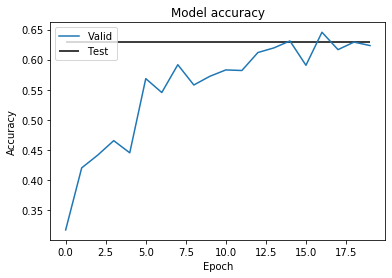

In [14]:
plt.hlines(acc,0,19)
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Valid', 'Test'],loc='upper left')
plt.show()

Graphs to visualize the training and validation data accuracy.

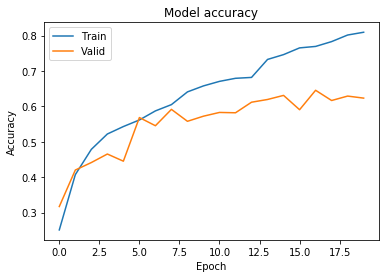

In [17]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'],loc='upper left')
plt.show()

According to the plot above, we can see that the accuracy of the validation set has steadily increased and is ultimately consistent with the accuracy of the testing set.

Also overfitting occurred after the twelfth iteration. After that, the accuracy of the training set continues to rise, but the accuracy of the validation set remains essentially unchanged.

Overall, the model performance is satisfactory. Perhaps adding some convolutional layers can achieve a better result.